In [1]:
import numpy as np
import pandas as pd

In [2]:
import keras
import utilities_LR
from pathlib import Path
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [3]:
config = {
    'data': {
        'n_datasets': 45_000, # the number of datasets
        
        'n_samples': 5_000, # the number of samples per dataset
        
        'n_features': 20, 
        # The total number of features. 
        # These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and 
        # n_features-n_informative-n_redundant-n_repeated useless features drawn at random.
        
        #'n_informative': random.randint(2, 10),
        'n_informative': 'random',
        # The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices 
        # of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently 
        # from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then 
        # placed on the vertices of the hypercube.
        ### int or 'random'
        
        'n_targets': 1,
        # The number of targets (or labels) of the classification problem.
    
        'n_clusters_per_class': 1,
        # The number of clusters per class.
        
        'class_sep': 1.0,
        # class_sepfloat, default=1.0
        # The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task 
        # easier.
        
        'noise': 0,
        # flip_y (fraction of samples whose class is assigned randomly)
        
        'shuffle': True,
        # Shuffle the samples and the features.
        
        'random_state': 46,
        # Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.
    },
    'lambda': {
        'data_prep': {
            'train_test_val_split': { # refer to sklearn doc
                'test_size': 0.1,
                'val_size': 0.15,
                'random_state': None,
                'shuffle': False, # should be always false
                'stratify': None
            }
        },
        'model_compile': {
            'optimizer_lambda': 'adam',
            'loss': 'mae',# keras.losses.BinaryCrossentropy(from_logits=False), #tf.keras.losses.get(config['lambda_net']['loss_lambda']), # 'mae'
            'metrics': ['mae', keras.losses.BinaryCrossentropy(from_logits=False)]
        },
        'model_fit': { # refer to keras API
            'batch_size': 64,
            'epochs': 500,
            'verbose': 0,
            'callbacks': None,
            'shuffle': True, # usually true
            'class_weight': None,
            'sample_weight': None,
            'initial_epoch': 0,
            'steps_per_epoch': None,
            'validation_steps': None,
            'validation_batch_size': None,
            'validation_freq': 1
        }
    },
    'inets': {
        'data_prep': {
            'train_test_val_split': { # refer to sklearn doc
                'test_size': 0.1,
                'val_size': 0.15,
                'random_state': None,
                'shuffle': False,
                'stratify': None
            },
            'train_noise':0
        },
        'model_compile': {
            
        },
        'model_fit': { # refer to keras API
            'batch_size': 256,
            'epochs': 1000,
            'verbose': 'auto',
            'callbacks': None,
            'shuffle': True,
            'class_weight': None,
            'sample_weight': None,
            'initial_epoch': 0,
            'steps_per_epoch': None,
            'validation_steps': None,
            'validation_batch_size': None,
            'validation_freq': 1
        }
    },
    'computation':{
        'n_jobs': 28,
        'use_gpu': True,
        'gpu_numbers': '3',
        'RANDOM_SEED': 1,   
    }
}

# Plot inet

In [4]:
@tf.function
def custom_loss(y_predictions_index, y_coef_pred):
    
    index = y_predictions_index[:, 0]
    y_true = y_predictions_index[:, 1:]
    
    index = tf.cast(index, tf.int32)
    
    X_feature_data_samples = tf.gather(valid_feature_data, index)
    
    #y_pred = tf.math.sigmoid(tf.linalg.matvec(valid_feature_data_sample, y_coef_pred))
    y_pred = tf.linalg.matvec(X_feature_data_samples, y_coef_pred)

    metric = tf.keras.losses.BinaryCrossentropy(
                                from_logits=True,
                                label_smoothing=0.0,
                                axis=-1,
                                reduction='auto',
                                name='binary_crossentropy')
    loss = metric(y_true, y_pred)
    return loss

In [5]:
def load_LR_inet():
    path = utilities_LR.inet_path_LR(config)
    
    #model = keras.models.load_model(path + '/modelKeras', custom_objects={'custom_loss': custom_loss})
    model = keras.models.load_model(path + '/modelKeras' + '.h5' , custom_objects={'custom_loss': custom_loss})
    print(path)
    return model

In [6]:
model_LR = load_LR_inet()

data_LR/nda45000_nsa5000_nfe20_ninrandom_nta1_ncc1_sep1.0_shuTrue_ran46/tsi0.1_vsi0.15_ranNone_shuFalse_strNone_bat64_epo500_shuTrue_claNone_samNone_ini0_steNone_vstNone_vbsNone_vfr1/tsi0.1_vsi0.15_noi0_ranNone_shuFalse_strNone_bat256_epo1000_shuTrue_claNone_samNone_ini0_steNone_vstNone_vbsNone_vfr1


2022-07-12 15:57:35.901845: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-12 15:57:40.992848: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13301 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-07-12 15:57:40.994102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 43877 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:25:00.0, compute capability: 8.6
2022-07-12 15:57:40.995091: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:2 w

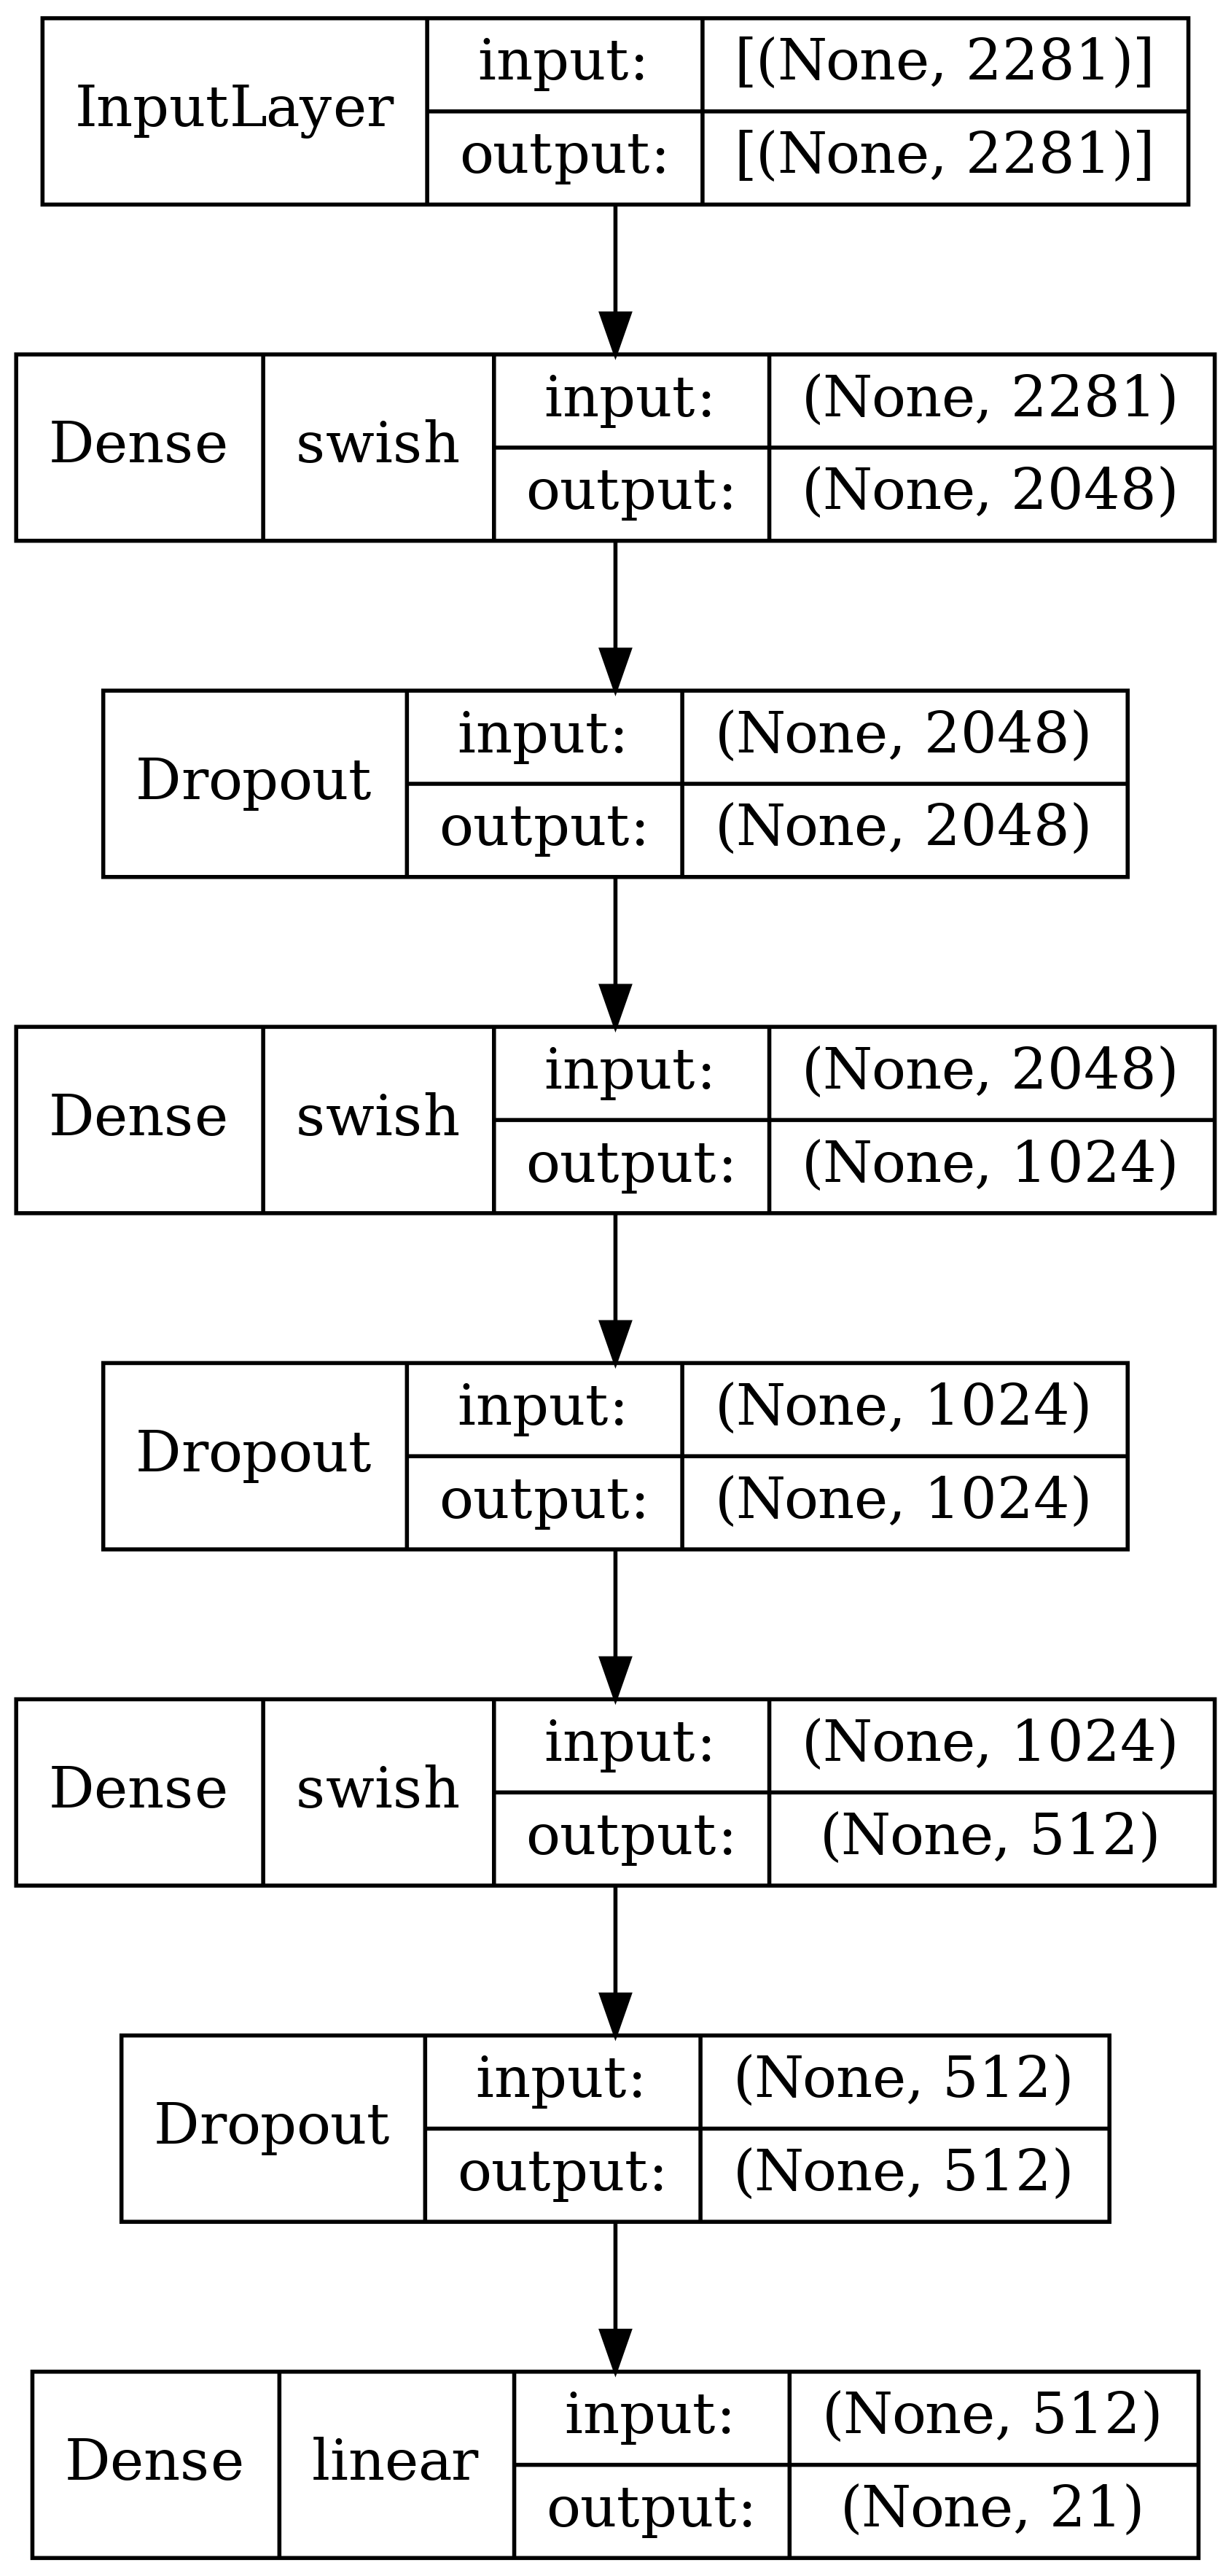

In [7]:
path = utilities_LR.inet_path_LR(config) + '/inet_plot.png'
plot_model(model_LR,
    to_file=path,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=400,
    layer_range=None,
    show_layer_activations=True)

# Plot Lambda

In [8]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense

In [9]:
model_n5 = Sequential()
model_n5.add(BatchNormalization(input_dim=5))
model_n5.add(Dense(50, activation='swish'))
model_n5.add(Dense(config['data']['n_targets'], activation='sigmoid'))

In [10]:
model_n10 = Sequential()
model_n10.add(BatchNormalization(input_dim=10))
model_n10.add(Dense(50, activation='swish'))
model_n10.add(Dense(config['data']['n_targets'], activation='sigmoid'))

In [11]:
model_n20 = Sequential()
model_n20.add(BatchNormalization(input_dim=20))
model_n20.add(Dense(100, activation='swish'))
model_n20.add(Dense(config['data']['n_targets'], activation='sigmoid'))

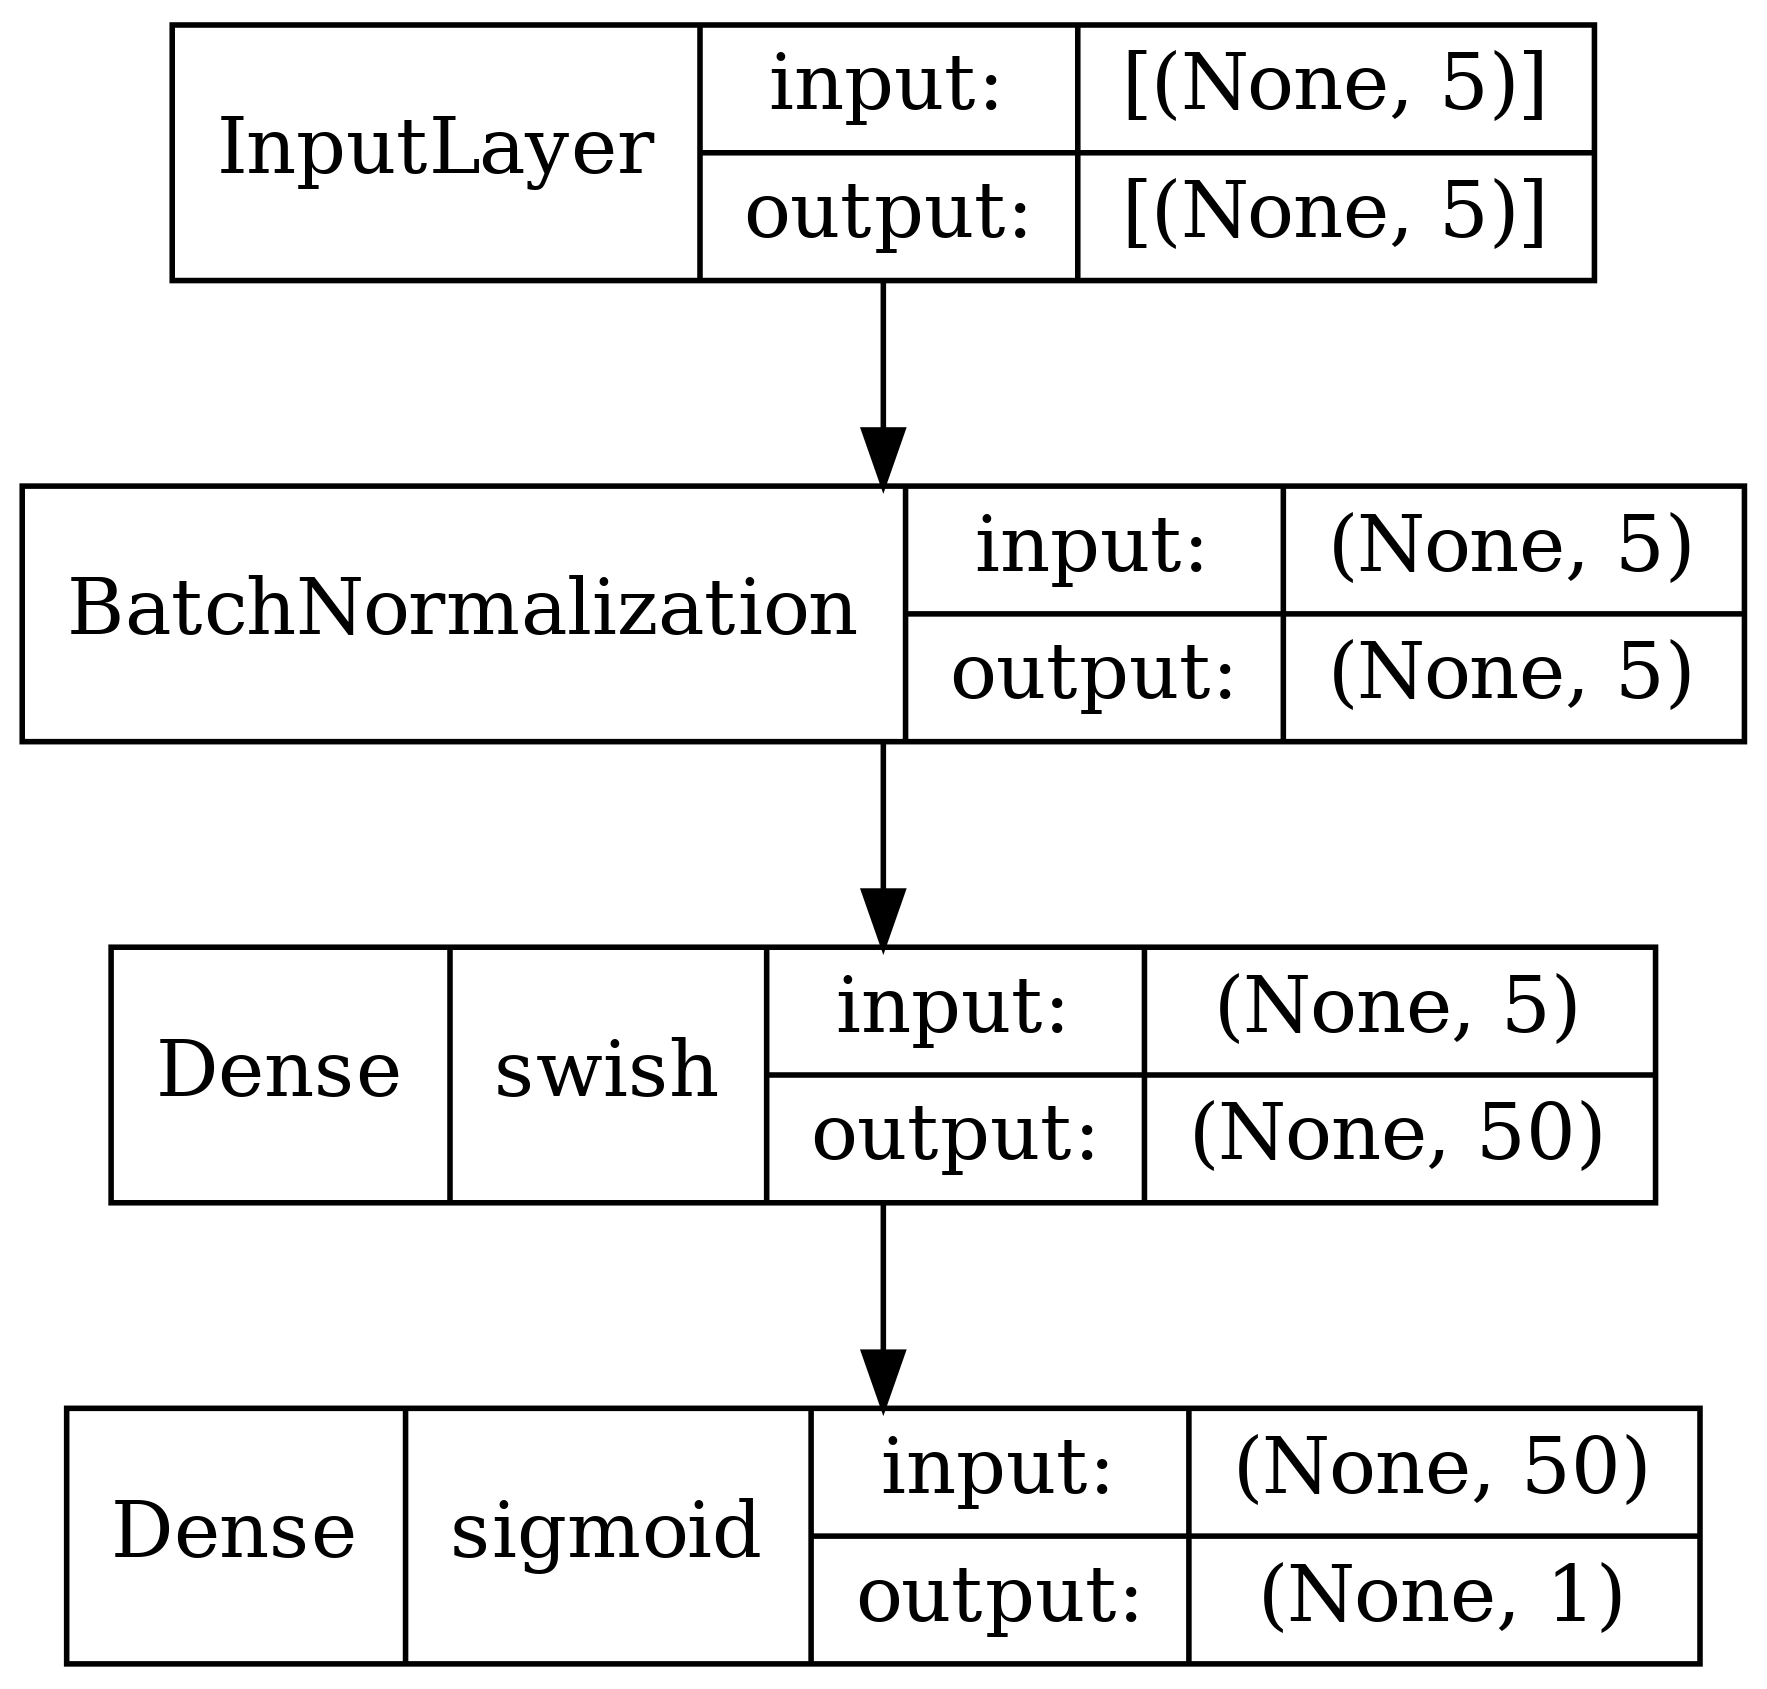

In [12]:
path = "./data_LR" + '/lambda_plot_n5.png'
plot_model(model_n5,
    to_file=path,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=400,
    layer_range=None,
    show_layer_activations=True)

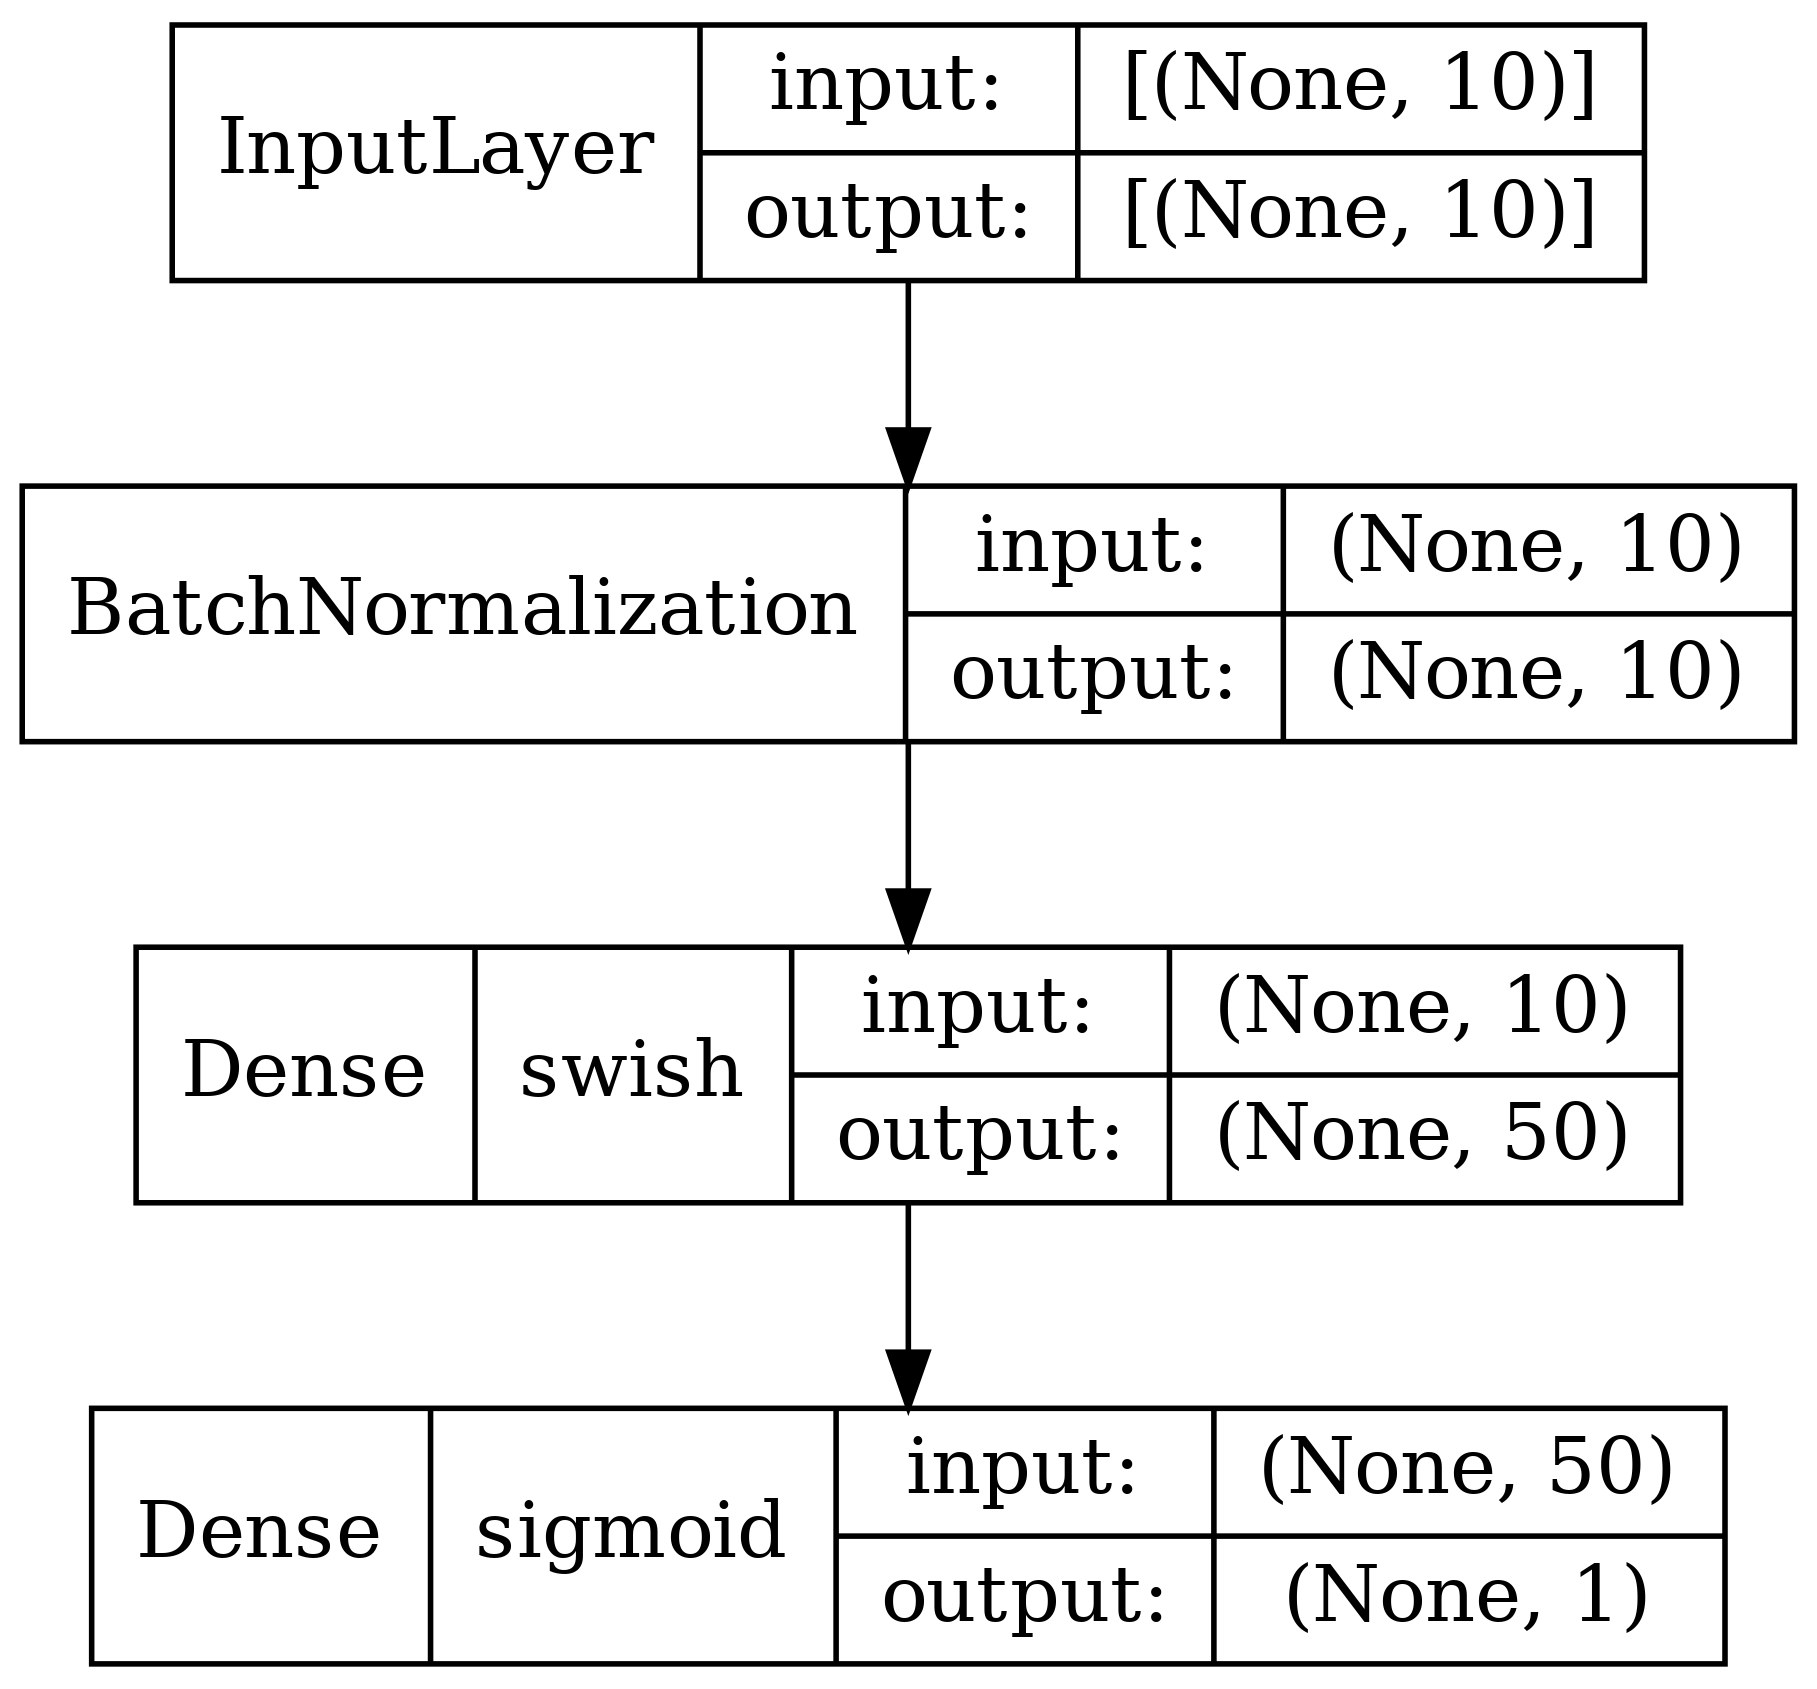

In [13]:
path = "./data_LR" + '/lambda_plot_n10.png'
plot_model(model_n10,
    to_file=path,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=400,
    layer_range=None,
    show_layer_activations=True)

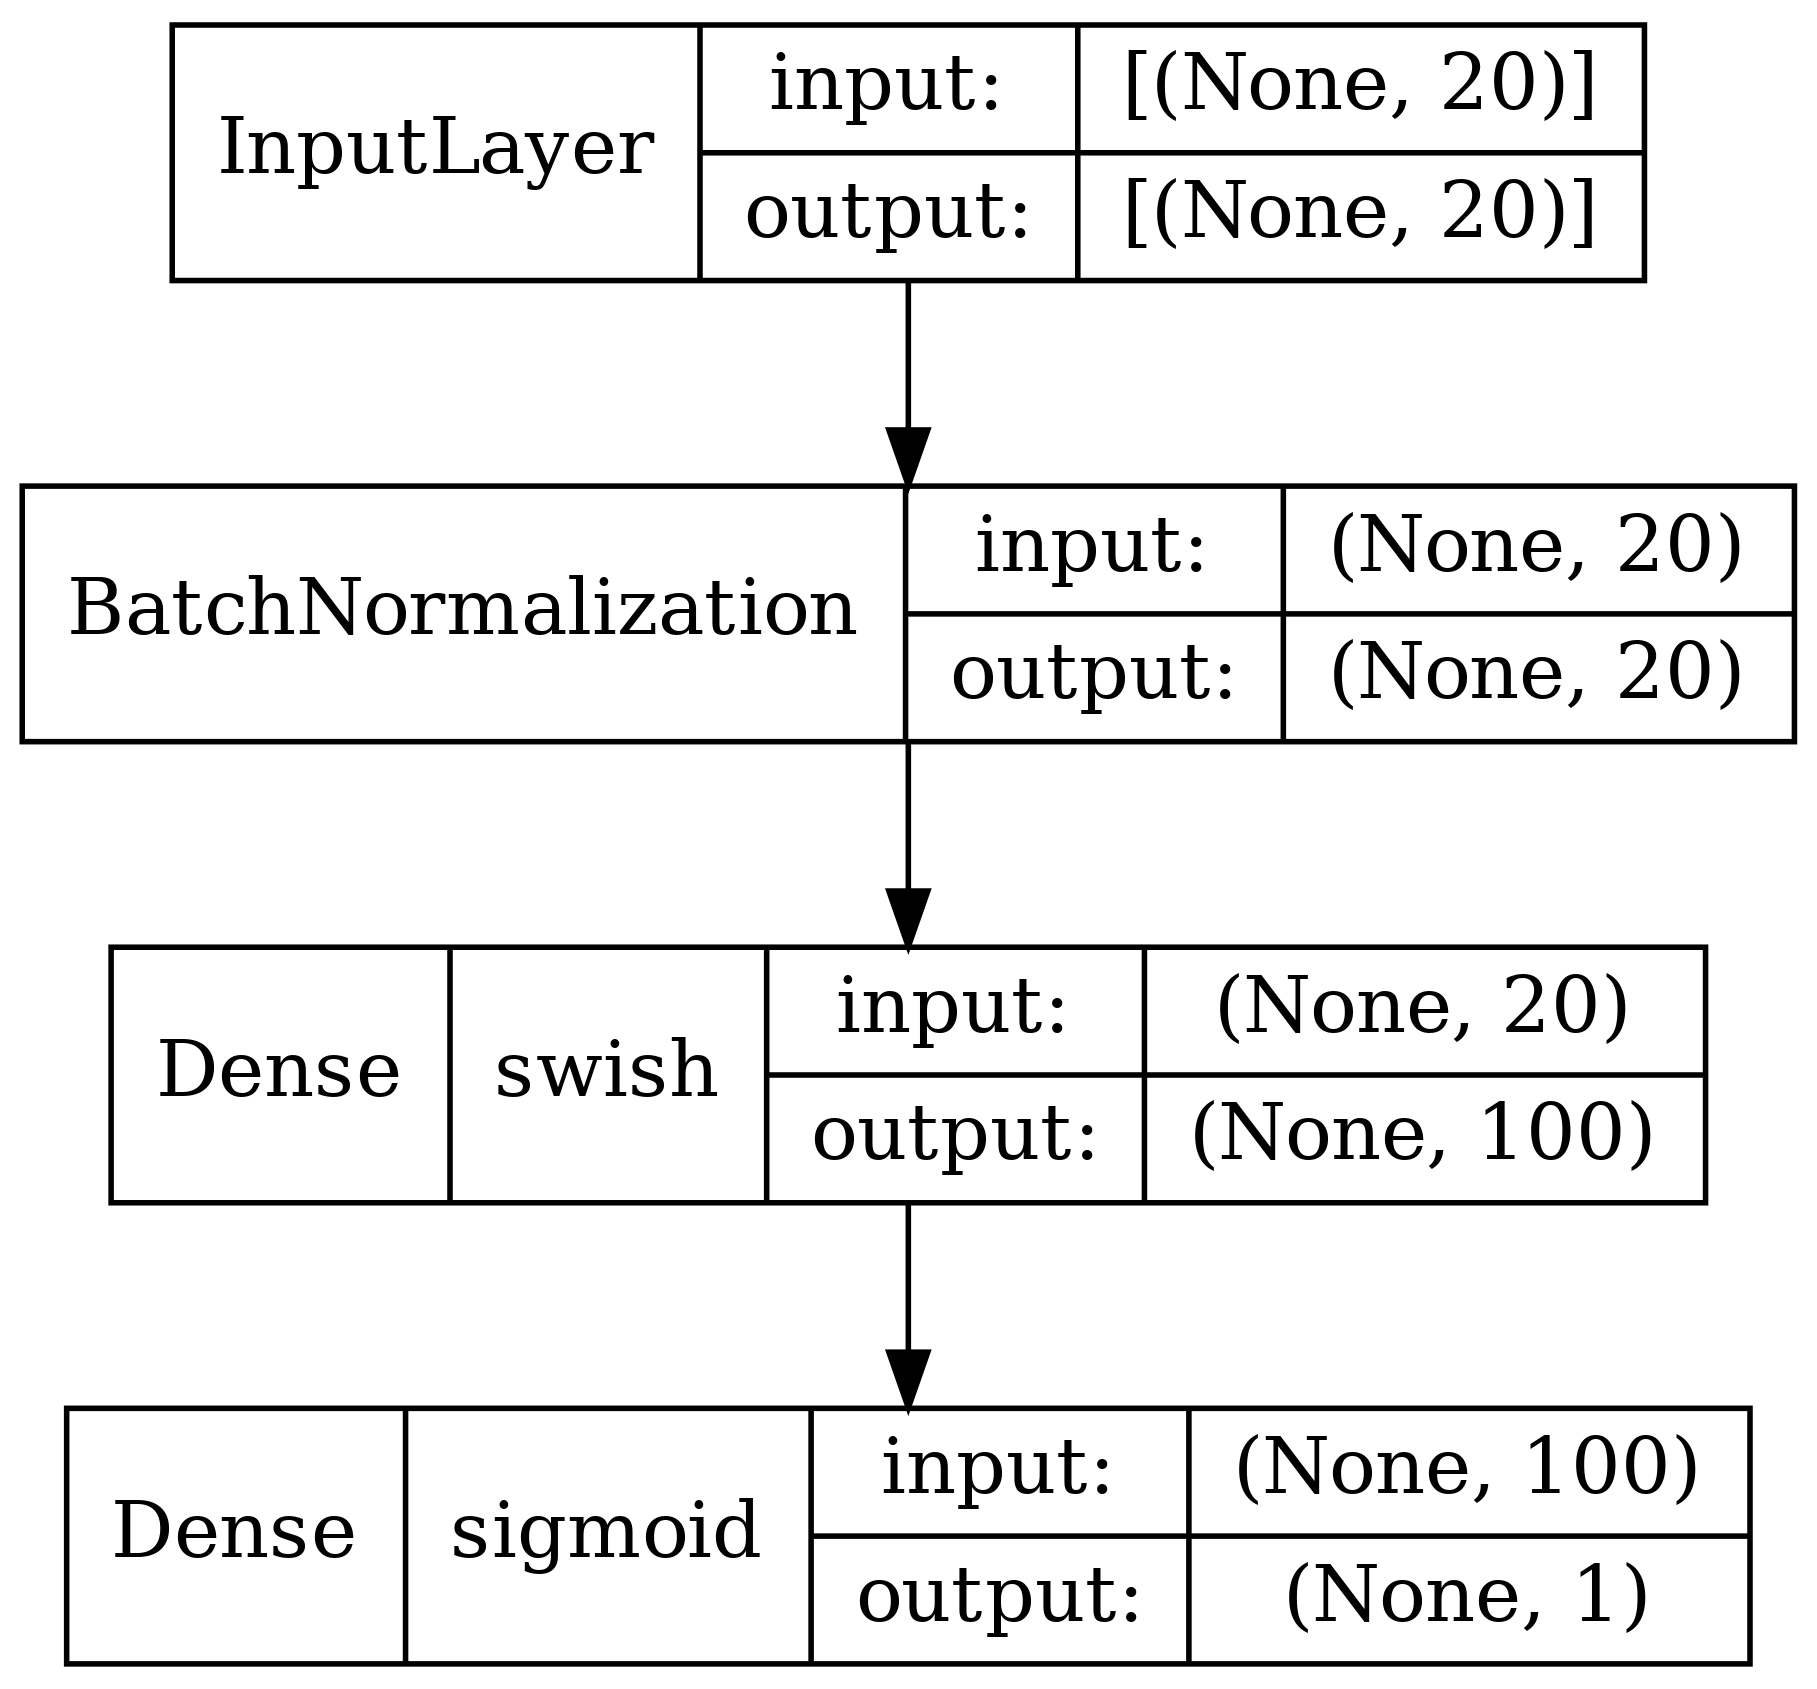

In [14]:
path = "./data_LR" + '/lambda_n20_plot.png'
plot_model(model_n20,
    to_file=path,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=400,
    layer_range=None,
    show_layer_activations=True)

# Plot inet DT

In [15]:
model_inet_DT= Sequential()
model_inet_DT.add(BatchNormalization(input_dim=20))
model_inet_DT.add(Dense(100, activation='swish'))
model_inet_DT.add(Dense(config['data']['n_targets'], activation='sigmoid'))

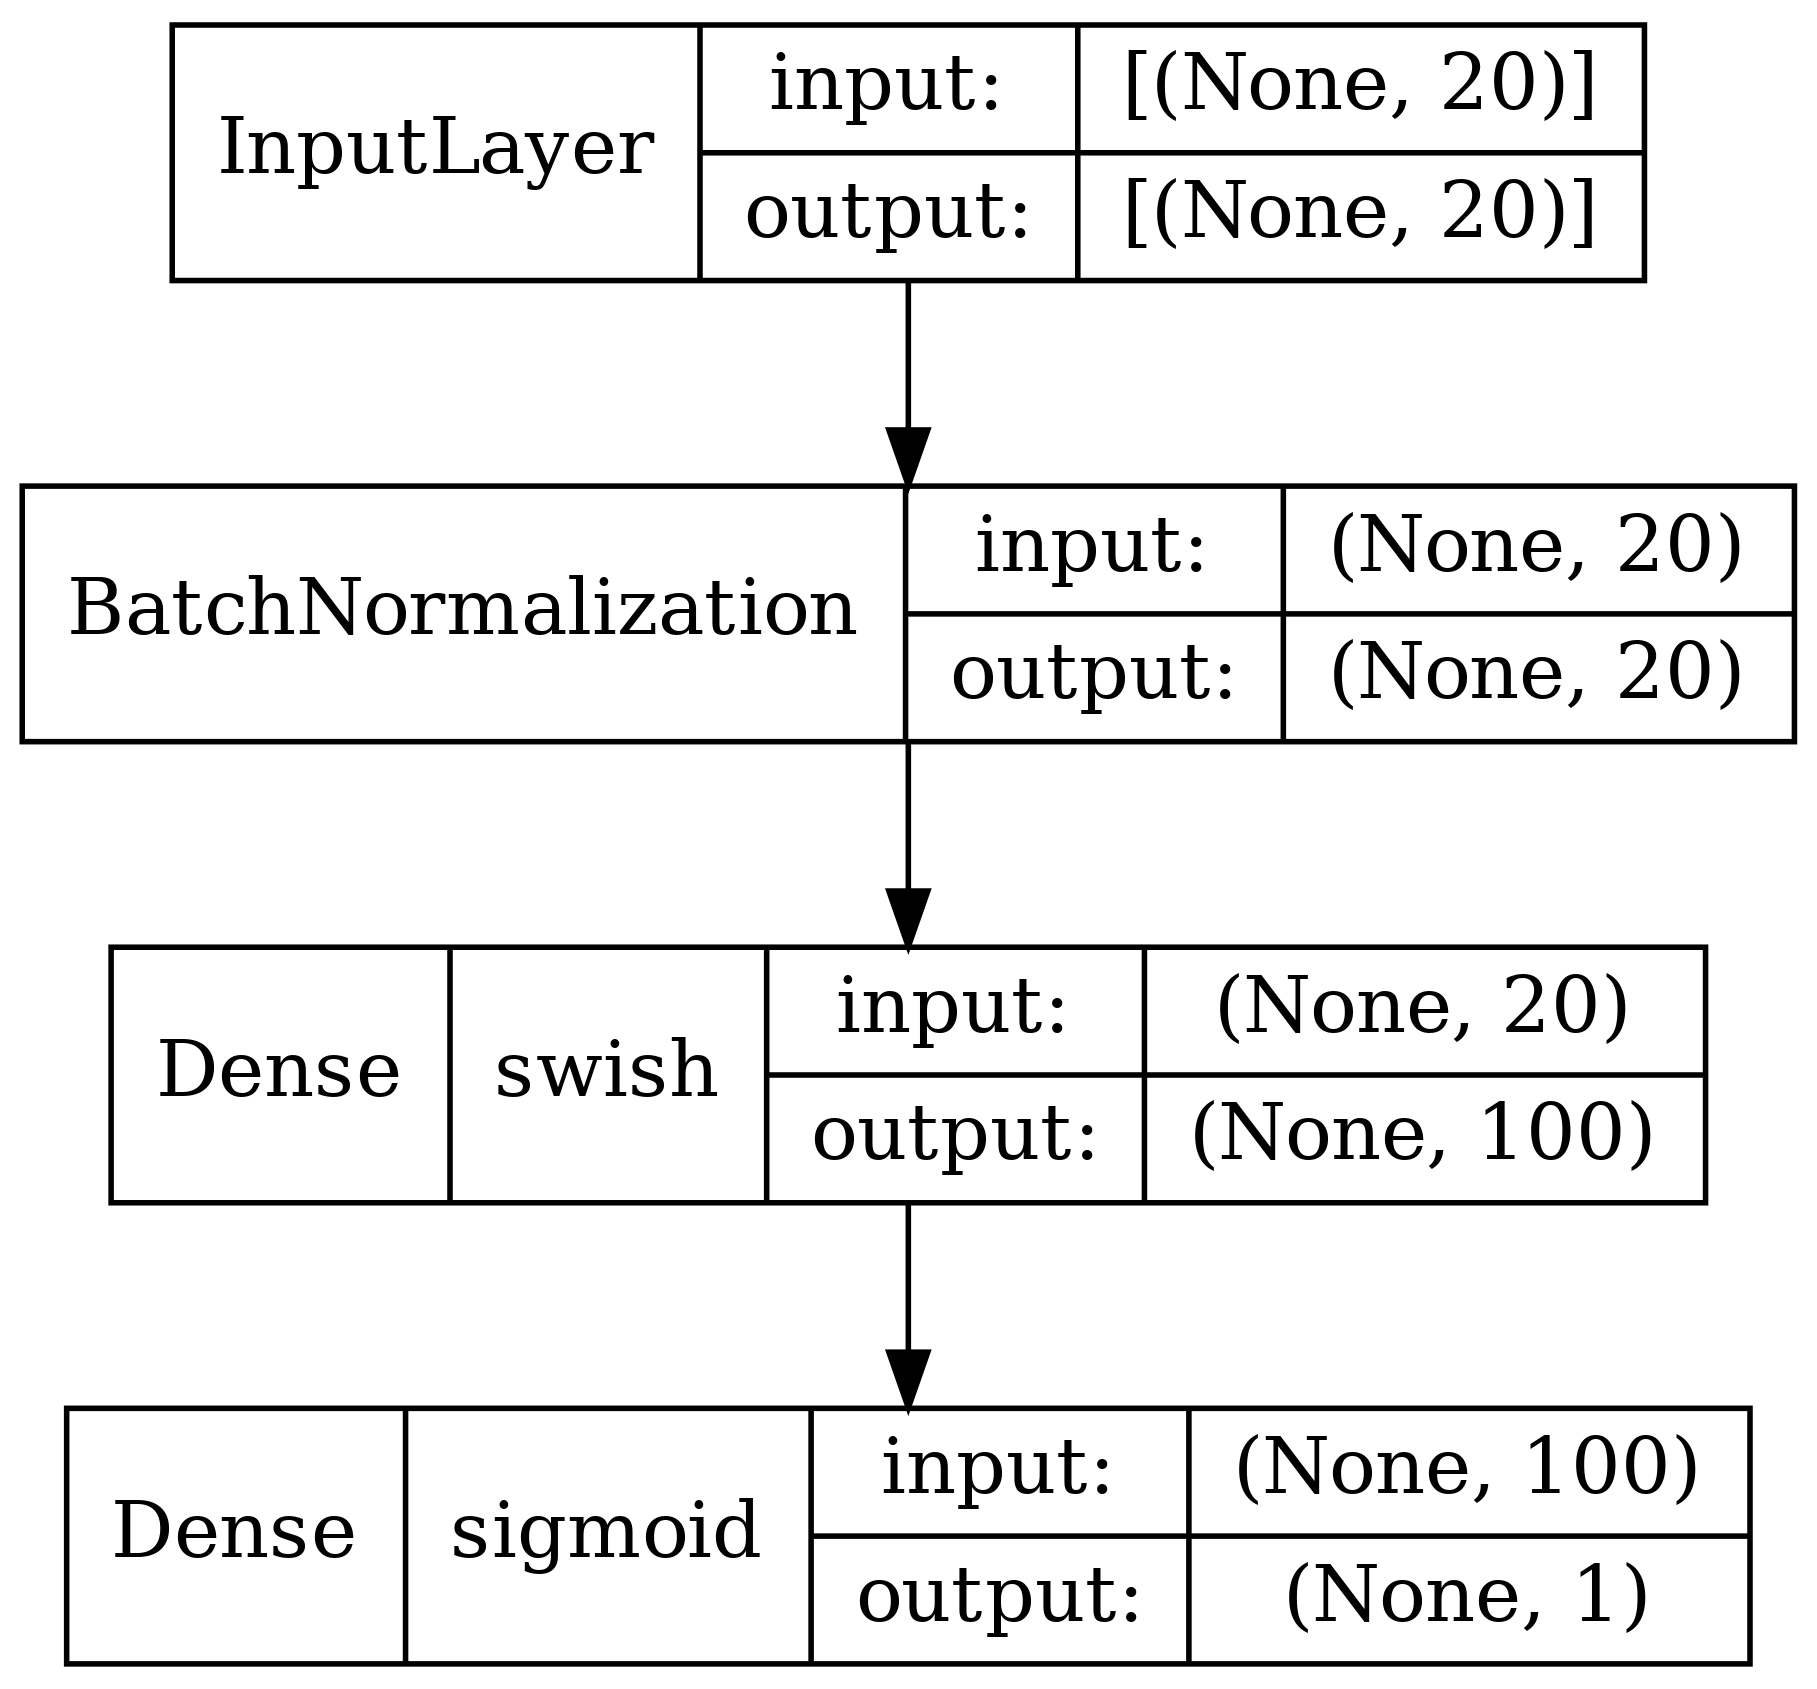

In [16]:
path = "./data_LR" + '/inet_DT.png'
plot_model(model_inet_DT,
    to_file=path,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=400,
    layer_range=None,
    show_layer_activations=True)